In [25]:
import pandas as pd
import numpy as np

In [6]:
#Import the Cab_Data into the notbook and name it 'Cab_Data'
#note that you had to use 'pip intall openpyxl' to install the package to open this excel files.
Cab_Data = pd.read_excel('C:/Users/14432/Downloads/Cab_Data.xlsx')

# Exploratory Data Analysis of the Cab Data

In [31]:
Cab_Data.head() #view the data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [23]:
Cab_Data.tail() #view the data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,2018-01-02,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


In [6]:
#Check for missing values
Cab_Data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [23]:
#There are no null values, so we want a description of our data
Cab_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
 7   Profit          359392 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 21.9+ MB


In [8]:
#The data types are correct. We want a statistical summary of our data to better undertand it.
Cab_Data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [ ]:
#From the summary statistics we see that the average trip distance is 22.6km, also the maximum price charged for a trip is about 2048 and the minimum is 15.6. 
#Why is the minimum price charged for a trip (15.6) lesser than the minimun cost of the trip (19), this may imply that not all trips are profitable.
#To be sure of this we should add a column containing the profits from each trip (Price Charged - Cost of Trip) to check each company's profits.

In [30]:
#We check for outliers
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'Transaction ID'}>,
        <Axes: title={'center': 'Date of Travel'}>],
       [<Axes: title={'center': 'KM Travelled'}>,
        <Axes: title={'center': 'Price Charged'}>],
       [<Axes: title={'center': 'Cost of Trip'}>, <Axes: >]], dtype=object)

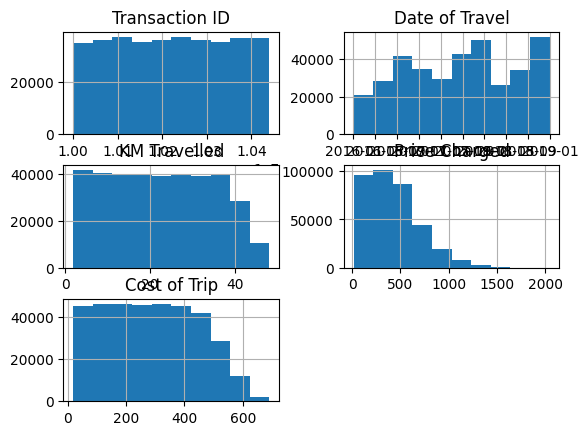

In [23]:
Cab_Data.hist()

<Axes: >

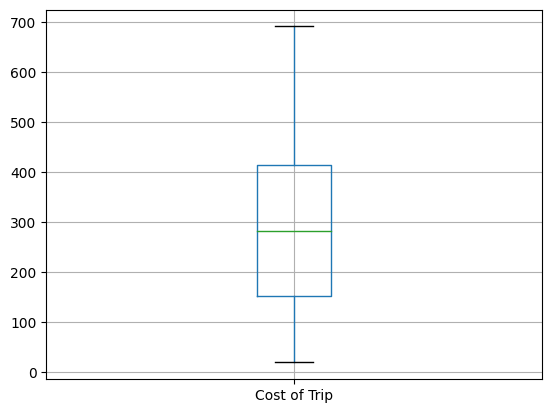

In [25]:
Cab_Data.boxplot('Cost of Trip')

<Axes: >

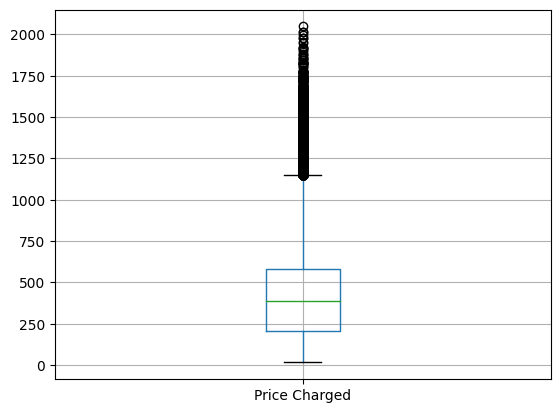

In [26]:
Cab_Data.boxplot('Price Charged')

In [ ]:
#The boxplot for price charged shows the presence of concentrated outliers. We cannot dismiss them as unimportant for the analysis.

In [25]:
#Which cab company has the higher occurence frequency in the data. to know this we will find the mode of the 'company' column.

Cab_Data.Company.mode()

0    Yellow Cab
Name: Company, dtype: object

In [ ]:
# The mode shows that yellow cab occurs more in the data, does this mean that yellow cab is patronized more? 
#Also, does it mean yellow cab makes more profit?

In [26]:
#Find the frequency of the occurence of yellow cab and pink cab.
Cab_Data.Company.value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

In [28]:
#Create a column with the profit from each trip derived by subtracting the cost of the trip from the price charged.
Cab_Data['Profit'] = Cab_Data['Price Charged'] - Cab_Data['Cost of Trip']

In [29]:
Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


Company
Pink Cab      Axes(0.125,0.2;0.775x0.68)
Yellow Cab    Axes(0.125,0.2;0.775x0.68)
Name: Profit, dtype: object

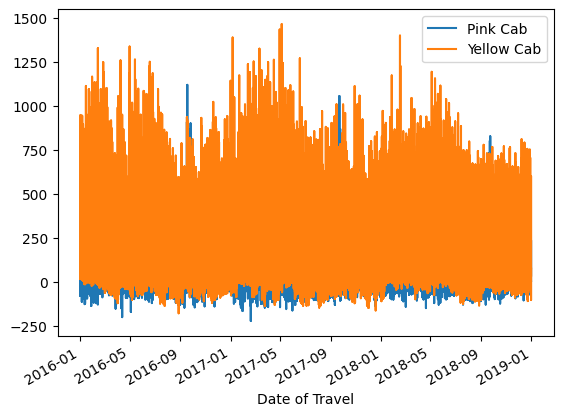

In [41]:
#What is the trend in profit made by the cab companies overtime?
#Visualize profit of the cab companies over time.
Cab_Data.set_index('Date of Travel', inplace=True)

Cab_Data.groupby('Company')['Profit'].plot(legend=True)



In [ ]:
#From the Line chart above, it can be seen that over time, yellow cab company has been more profitable than the pink cab company.

Text(0.5, 1.0, 'Relationship between Profit and KM Travelled')

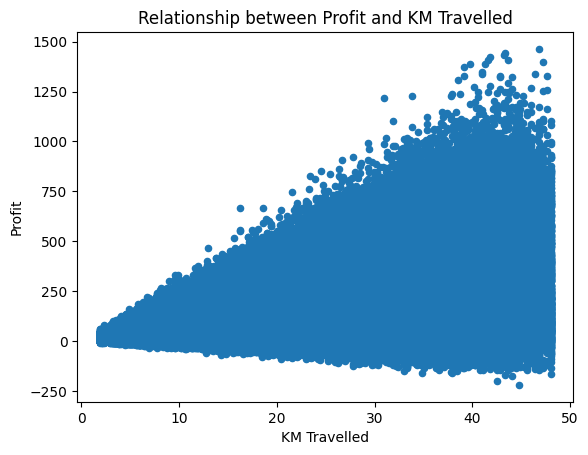

In [42]:
# Is there a relationship between the kilometer travelled and profit made by the cab companies?
#Scatter plot of 'km travelled' and 'profit'
Cab_Data.plot.scatter('KM Travelled', 'Profit')
plt.title('Relationship between Profit and KM Travelled')

In [ ]:
#From the scatter plot above, it appears that there is a positive relationship betwwen the kilometer a cab company travels and the profit made. 
#This implies that the more the kilometer travelled, the higher the profit made.
#Further statistical tests will be run to confirm this.

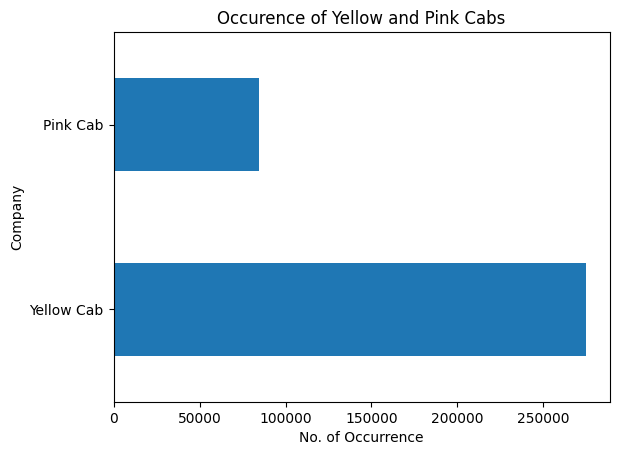

In [8]:
#Visualize the categorical data (company).
# creating the bar plot
import matplotlib.pyplot as plt
Cab_Data.Company.value_counts().plot.barh()
 
plt.xlabel("No. of Occurrence")
plt.ylabel("Company")
plt.title("Occurence of Yellow and Pink Cabs")
plt.show()
plt.close()

In [ ]:
#The bar chart shows that the yellow cab company has more transactions than the pink cab company. 


In [9]:
#Contigency Table: Frequency of a particular cab company's usage in cities.
pd.crosstab(Cab_Data.City, Cab_Data.Company)

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,1762,5795
AUSTIN TX,1868,3028
BOSTON MA,5186,24506
CHICAGO IL,9361,47264
DALLAS TX,1380,5637
DENVER CO,1394,2431
LOS ANGELES CA,19865,28168
MIAMI FL,2002,4452
NASHVILLE TN,1841,1169


In [ ]:
#One can see that some despite the fact that yellow cab is been used more generally, some states use the pink cab more that the yellow cab.
#The majority of states use yellow cab more than pink cab. Nashville, Pittsburgh, Sacramento and San Diego use Pink cab more but by a small proportion.

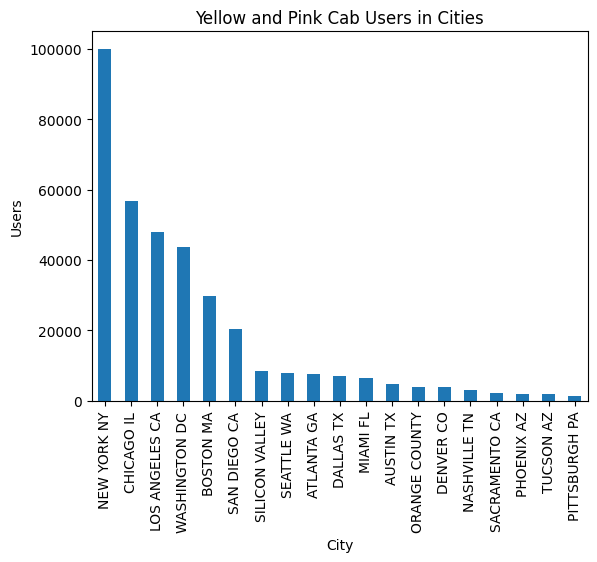

In [61]:
Cab_Data.City.value_counts().plot.bar()
#Note: for horizontal barchat use 'plot.barh()', for vertical bar chat use 'plot.bar()'.


plt.xlabel("City")
plt.ylabel("Users")
plt.title("Yellow and Pink Cab Users in Cities")
plt.show()
plt.close()

In [ ]:
# The graph above shows that New York has the highest number of yellow and pink cab users, and Pittsburgh has the lowest number.

# Exploratory Data Analysis of City Data

In [4]:
#Import City Data
City_Data = pd.read_excel('C:/Users/14432/Downloads/City_Data.xlsx')

In [35]:
#View the data
City_Data.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [36]:
City_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 612.0+ bytes


array([[<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Users'}>]], dtype=object)

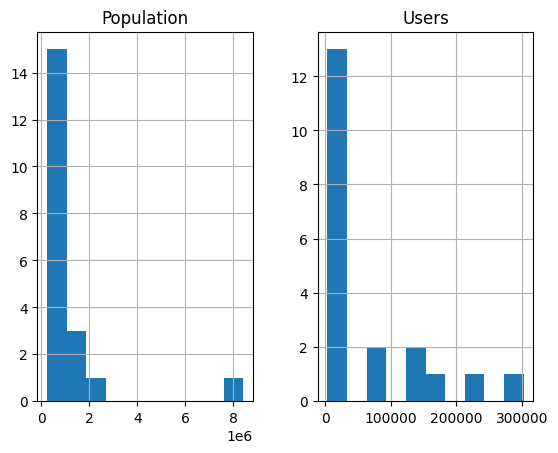

In [37]:
#Check for outliers
City_Data.hist()

In [ ]:
#There seems to be no outliers in the data, the users distribution match the population distribution, this may imply that population size may have an effect on demand. 
#We would transfrom the data by finding the percentage of the users in the population ([users/population]*100).

In [9]:
City_Data['Perc_Users'] = ((City_Data['Users'] / City_Data['Population']) *100).round(2)

In [22]:
City_Data.head()

,City,Population,Users,Perc_Users
0,NEW YORK NY,8405837,302149,3.59
1,CHICAGO IL,1955130,164468,8.41
2,LOS ANGELES CA,1595037,144132,9.04
3,MIAMI FL,1339155,17675,1.32
4,SILICON VALLEY,1177609,27247,2.31


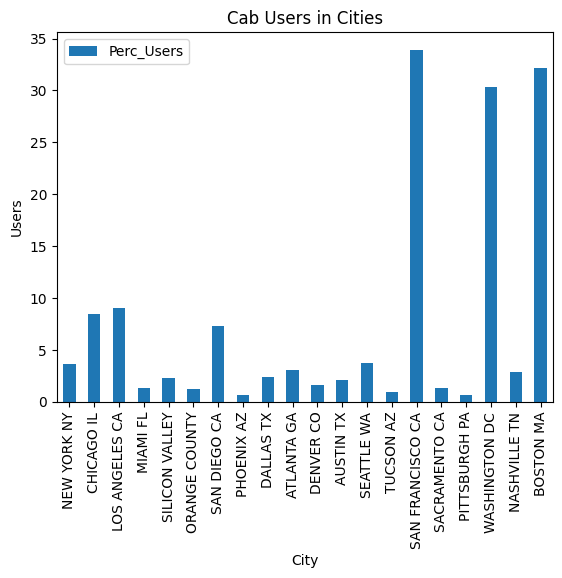

In [51]:
#Visualization of cab users in cities.
import matplotlib.pyplot as plt
City_Data.plot.bar('City', 'Perc_Users')

plt.xlabel("City")
plt.ylabel("Users")
plt.title("Cab Users in Cities")
plt.show()
plt.close()

In [ ]:
#The bar chart above shows the percentage of cab users in the population in cities. From the graph, we can see that Boston, San Francisco and Washington DC has the highest percentage of cab users.

In [12]:
#Mean difference: to check the relationship between population and users 
#.i.e the more the mean difference, the stronger the association between the variables.

#calculate means for each group:
Population_Mean = City_Data['Population'].mean()
Users_Mean = City_Data['Users'].mean()

#calculating the difference in mean 
mean_diff = Population_Mean - Users_Mean

#print mean difference
print(f'Mean difference: {mean_diff}')

Mean difference: 1167071.35


In [ ]:
#The output shows a big difference in the mean, this may imply that there may be a relationship between the population size and users.

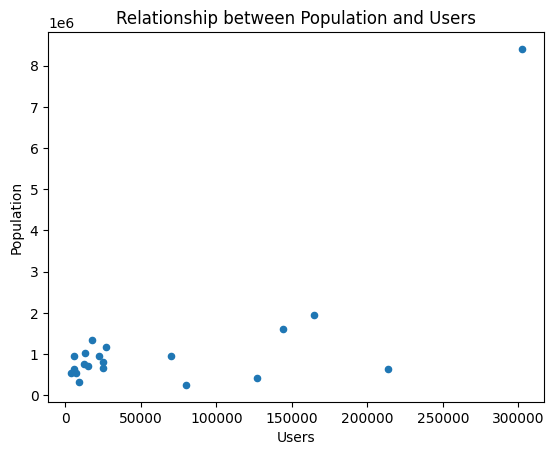

In [36]:
#Plot a scatter plot to check for a relationship between users and population. Note that 'plot.scatter()' is the code to plot scatter plot.
import matplotlib.pyplot as plt
City_Data.plot.scatter('Users', 'Population')
plt.title('Relationship between Population and Users')
 
plt.show()
plt.close()

In [ ]:
# From the scatter plot however, we cannot say that there is indeed a relationship between the two variables. A statistical test is needed to check for a relationship.

# Merging of Tables

In [30]:
Transaction = pd.read_csv('C:/Users/14432/Downloads/Transaction_ID_Data.csv')
Customer = pd.read_csv('C:/Users/14432/Downloads/Customer_ID_Data.csv')

In [31]:
Transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [32]:
#Rename some columns in the tables
Transaction = Transaction.rename(columns = {"Transaction ID":"Transaction_ID","Customer ID" : "Customer_ID"})
Transaction.head() 


,Transaction_ID,Customer_ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [33]:
Customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [34]:
Customer = Customer.rename(columns = {"Customer ID":"Customer_ID"})

In [35]:
Transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction_ID  440098 non-null  int64 
 1   Customer_ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [36]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer_ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [37]:
Cab_Data = Cab_Data.rename(columns = {"Transaction ID":"Transaction_ID"})
Cab_Data.head()


,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


In [38]:
#to see the behaviour of customers in relation to the cab companies, we combine tables.
#we add the gender and age columns to the Cab_Data table using transaction Id as the connection.

In [39]:
#First, insert the transaction_id column from the transactions table into the customer table using customer_id as the key.
#Note that when merging, you must assign the new data frame into the data frame you are merging .i.e customer = customer.merge .... 
#where using customer =  assigns the merged data into customer dataframe 
Customer = Customer.merge(Transaction[['Customer_ID', 'Transaction_ID']], on = 'Customer_ID')

In [72]:
#next merge the customer dataframe to the cab_data data frame using tansaction_id as the key.
Cab_Data = pd.merge(Cab_Data, Customer[["Transaction_ID", "Gender", "Age", "Income (USD/Month)"]], on="Transaction_ID")

In [73]:
Cab_Data.head()

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Gender_x,Age_x,Age_Group,Gender_y,Age_y,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,Male,28,Young_Adult,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,Male,27,Young_Adult,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,Male,53,Middle_Aged,Male,53,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,Male,23,Young_Adult,Male,23,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,Male,33,Adult,Male,33,8536


In [82]:
Cab_Data = Cab_Data.drop('Gender_y', axis = 1)

In [83]:
Cab_Data = Cab_Data.drop('Age_y', axis = 1)

In [84]:
Cab_Data.head()

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Gender_x,Age_x,Age_Group,Income (USD/Month),Income_Group
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,Male,28,Young_Adult,10813,Upper Middle Earner
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,Male,27,Young_Adult,9237,Upper Middle Earner
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,Male,53,Middle_Aged,11242,Upper Middle Earner
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,Male,23,Young_Adult,23327,High Income Earner
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,Male,33,Adult,8536,Upper Middle Earner


In [85]:
Cab_Data = Cab_Data.rename(columns = {"Age_x":"Age"})

In [86]:
Cab_Data = Cab_Data.rename(columns = {"Gender_x":"Gender"})

In [87]:
Cab_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Profit              359392 non-null  float64       
 8   Gender              359392 non-null  object        
 9   Age                 359392 non-null  int64         
 10  Age_Group           359392 non-null  category      
 11  Income (USD/Month)  359392 non-null  int64         
 12  Income_Group        359392 non-null  category      
dtypes: category(2), datetime64[ns

In [84]:
#Contigency Table: Frequency of a particular gender's use of cabs
pd.crosstab(Cab_Data.Gender, Cab_Data.Company)


Company,Pink Cab,Yellow Cab
Gender,,
Female,37480,116000
Male,47231,158681


In [ ]:
#From the contigency table above, we can see that the population of men that use cabs are more than the population of women that use cabs.
#Is this due to the fact that men are more than women?

In [88]:
#the minimum age of customers in the datset is...
Cab_Data['Age'].min()

18

In [89]:
#The maximum age of customers in the datset is...
Cab_Data['Age'].max()

65

In [88]:
#To see the age group that patronizes cabs more we will group the ages by making bins and categorizing them.
bins = [18, 20, 30, 45, 60, 100]
labels = ['Teen_Adults', 'Young_Adult', 'Adult', 'Middle_Aged', 'Elder']
Cab_Data['Age_Group'] = pd.cut(Cab_Data['Age'], bins=bins, labels=labels, right=False)
Cab_Data.head()

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Gender,Age,Age_Group,Income (USD/Month),Income_Group
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,Male,28,Young_Adult,10813,Upper Middle Earner
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,Male,27,Young_Adult,9237,Upper Middle Earner
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,Male,53,Middle_Aged,11242,Upper Middle Earner
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,Male,23,Young_Adult,23327,High Income Earner
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,Male,33,Adult,8536,Upper Middle Earner


In [74]:
#The minimum monthly income of customers is?
Cab_Data['Income (USD/Month)'].min()

2000

In [75]:
#The maximum monthly income is?
Cab_Data['Income (USD/Month)'].max()

35000

In [89]:
#To see the income group that patronizes cabs more we will group the monthly by making bins and categorizing them.
bins = [1026, 3996, 12376, 100000 ]
labels = ['Lower Middle Earner', 'Upper Middle Earner', 'High Income Earner']
Cab_Data['Income_Group'] = pd.cut(Cab_Data['Income (USD/Month)'], bins=bins, labels=labels, right=False)
Cab_Data.head()

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Gender,Age,Age_Group,Income (USD/Month),Income_Group
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,Male,28,Young_Adult,10813,Upper Middle Earner
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,Male,27,Young_Adult,9237,Upper Middle Earner
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,Male,53,Middle_Aged,11242,Upper Middle Earner
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,Male,23,Young_Adult,23327,High Income Earner
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,Male,33,Adult,8536,Upper Middle Earner


In [90]:
#Save the master data as a csv file to working directory (pythondata) 
Cab_Data.to_csv('Cab_Data1.csv')

In [91]:
#Import master data
Cab_Data1 = pd.read_csv('Cab_Data1.csv')

In [92]:
Cab_Data1.head()

,Unnamed: 0,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Gender,Age,Age_Group,Income (USD/Month),Income_Group
0,0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,Male,28,Young_Adult,10813,Upper Middle Earner
1,1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,Male,27,Young_Adult,9237,Upper Middle Earner
2,2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,Male,53,Middle_Aged,11242,Upper Middle Earner
3,3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,Male,23,Young_Adult,23327,High Income Earner
4,4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,Male,33,Adult,8536,Upper Middle Earner


In [93]:
Cab_Data1 = Cab_Data1.drop(Cab_Data1.columns[[0]], axis=1)

In [94]:
Cab_Data1.head()

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Gender,Age,Age_Group,Income (USD/Month),Income_Group
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,Male,28,Young_Adult,10813,Upper Middle Earner
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,Male,27,Young_Adult,9237,Upper Middle Earner
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,Male,53,Middle_Aged,11242,Upper Middle Earner
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,Male,23,Young_Adult,23327,High Income Earner
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,Male,33,Adult,8536,Upper Middle Earner


In [95]:
Cab_Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction_ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  object 
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Profit              359392 non-null  float64
 8   Gender              359392 non-null  object 
 9   Age                 359392 non-null  int64  
 10  Age_Group           359392 non-null  object 
 11  Income (USD/Month)  359392 non-null  int64  
 12  Income_Group        359392 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 35.6+ MB


In [96]:
#Convert the data type of date of travel column to datetime.
Cab_Data1['Date of Travel'] = pd.to_datetime(Cab_Data1['Date of Travel'])

In [97]:
Cab_Data1['Transaction_ID'] = Cab_Data1['Transaction_ID'].astype(str)

In [98]:
Cab_Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_ID      359392 non-null  object        
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Profit              359392 non-null  float64       
 8   Gender              359392 non-null  object        
 9   Age                 359392 non-null  int64         
 10  Age_Group           359392 non-null  object        
 11  Income (USD/Month)  359392 non-null  int64         
 12  Income_Group        359392 non-null  object        
dtypes: datetime64[ns](1), float64

In [15]:
#Contigency Table: Frequency of a particular Age group use of cabs
pd.crosstab(Cab_Data1.Age_Group, Cab_Data1.Company)

Company,Pink Cab,Yellow Cab
Age_Group,,
Adult,32681,106960
Elder,5429,17257
Middle_Aged,13634,44564
Teen_Adults,5497,16940
Young_Adult,27470,88960


In [ ]:
#From the contigency table above, we can see that adult age group use cabs the most, followed by the young adults, the teen adults use cabs the least.
#The age group bin: 18-19(teen adults), 20-30(young adult), 30-45(adults), 45-60(middle-aged), 60-100(elder).

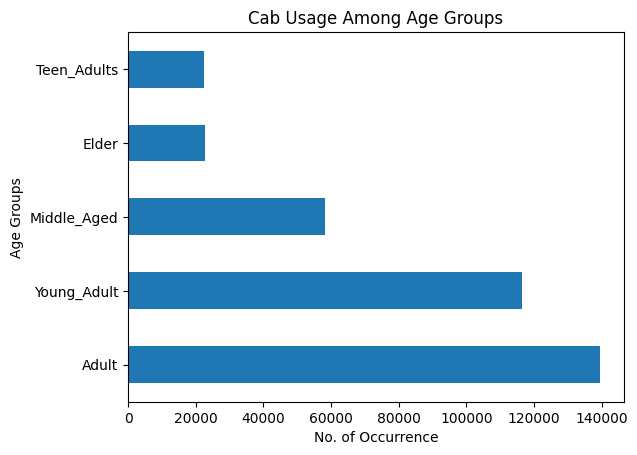

In [17]:
#Visualize the categorical data (Age Group).
# creating the bar plot
import matplotlib.pyplot as plt
Cab_Data1.Age_Group.value_counts().plot.barh()
 
plt.xlabel("No. of Occurrence")
plt.ylabel("Age Groups")
plt.title("Cab Usage Among Age Groups")
plt.show()
plt.close()

In [ ]:
#From the bar chart above, our contigency table is better understood. 
#Adult population of customers use cabs the most.
#Teen adults and elders use cabs the least.

In [99]:
#Contigency Table: Frequency of a particular Income group's use of cabs
pd.crosstab(Cab_Data1.Income_Group, Cab_Data1.Company)

Company,Pink Cab,Yellow Cab
Income_Group,,
High Income Earner,50269,162768
Lower Middle Earner,6779,21694
Upper Middle Earner,27663,90219


In [ ]:
#From the contigency table above, we can see that high income earners patronize cabs the most among the three income groups.
#The income groups classification is derived according to the world bank atlas method. GNI per capita can be classified as; 
#Lower middle earner ($1026 - $3995), upper middle income earners($3996 - $12375), high income earners($12376 - above).

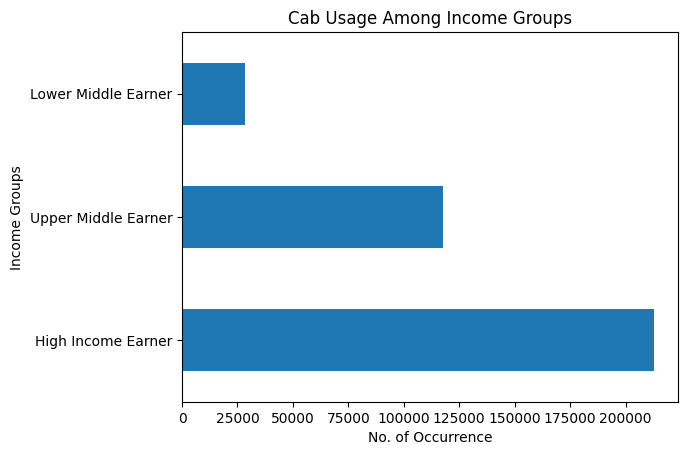

In [100]:
#Visualize the categorical data (Age Group).
# creating the bar plot
import matplotlib.pyplot as plt
Cab_Data1.Income_Group.value_counts().plot.barh()
 
plt.xlabel("No. of Occurrence")
plt.ylabel("Income Groups")
plt.title("Cab Usage Among Income Groups")
plt.show()
plt.close()

In [ ]:
#From the bar chart above, our contigency table is better understood. 
#High Income Earners use cabs the most.
#Low middle Income Earners use cabs the least.

# Hypothesis Testing

In [ ]:
# The output of the hypothesis test is generally a statistical value called the p-value. 
#This value is the probability of occurrence of the null hypothesis. 
#There is a threshold preset (generally 5% chance of the null hypothesis been true and the alternative hypothesis is false, 
#or 95% chance of the alternative hypothesis been true and the null hypothesis false.)
#where if the pvalue is less than 0.05 or 5% we reject the null hypothesis and if more than 0.05 we fail to reject.
#The following hypotheses will be tested using various statistical methods.

###### Hypothesis 1

In [15]:
# Is cab use associated with gender?
# H0: There is no significant association between the two variables - Gender and Transaction_ID.
# H1: There is a significant association between the two variables - Gender and Transaction_ID.

#We test the following hypothesis using the Chi-square statistical test.
from scipy.stats import chi2_contingency

#creating contingency table for the variables Transaction_ID and Gender
contingency_table = pd.crosstab(Cab_Data1.Transaction_ID, Cab_Data1.Gender)

#applying chi square function to obtain p value by passing contingency table to the function
res1 = chi2_contingency(contingency_table)
print(f'the resulting p-value for the chi square test is {res1.pvalue}')


the resulting p-value for the chi square test is 0.4992157406942037


In [ ]:
#Inference: *The result provides a p value of 0.4992 (49.9%) which is greater than the significance threshold of 0.05. 
#           *Using this we can conclude for our hypothesis test that we fail to reject the null hypothesis. 
#           *Hence we can assume our null hypothesis to be true which says — There is no significant association between the 2 variables — Transaction_ID and Gender.
#           *Thus we can say that cab use by customers is not associated with gender.

###### Hypothesis 2

In [16]:
# Is cab use associated with age?
# H0: There is no significant association between the two variables - Age_Group and Transaction_ID.
# H1: There is a significant association between the two variables - Age_Group and Transaction_ID.

#We test the following hypothesis using the Chi-square statistical test.

#creating contingency table for the variables Transaction_ID and Age_Group
contingency_table = pd.crosstab(Cab_Data1.Transaction_ID, Cab_Data1.Age_Group)

#applying chi square function to obtain p value by passing contingency table to the function
res2 = chi2_contingency(contingency_table)
print(f'the resulting p-value for the chi square test is {res2.pvalue}')


the resulting p-value for the chi square test is 0.49890203790082266


In [ ]:
#Inference: *The result provides a p value of 0.4989 which is greater than the significance threshold of 0.05. 
#           *Using this we can conclude for our hypothesis test that we fail to reject the null hypothesis. 
#           *Hence we can assume our null hypothesis to be true which says — There is no significant association between the 2 variables — Transaction_ID and Age_Group.
#           *Thus we can say that cab use by customers is not associated age group.

###### Hypothesis 3

In [ ]:
#What type of relationship exists between population and cab users?
# H0: There is a negative relationship between the two variables - population and users.
# H1: There is a positive relationship between the two variables - population and users.

In [22]:
#Find the correlation coefficient of population and users in city data.
City_Data['Population'].corr(City_Data['Users'])

0.7033818983284993

In [29]:
scipy.stats.pearsonr(City_Data['Population'], City_Data['Users'])

PearsonRResult(statistic=0.7033818983284993, pvalue=0.000540265155473827)

In [ ]:
# Inference: *The Pearson's correlation coefficient gives us a value of approximately 0.7 and a pvalue of 0.0005.
#            *The correlation coefficent indicates that there is a positive relationship between the populstion size of a city and the amount of cab users in the city.
#            *This positive relationship implies that the bigger the population size of a city, the more cab users there will be.
#            *The pvalue of 0.00054 is less than significance value of 0.05, therefore, we fail to accept the null hypothesis.
#            *Hence our alternative hypothesis is true.

###### Hypothesis 4

In [ ]:
# What is the correlation coefficient of the variables - KM Travelled and Profit?
# H0: There is a negative relationship between the two variables - KM Travelled and Profit.
# H1: There is a positive relationship between the two vriables - KM Travelled and Profit.

In [9]:
import scipy
scipy.stats.pearsonr(Cab_Data1['KM Travelled'], Cab_Data1['Profit'])

PearsonRResult(statistic=0.4627681978971052, pvalue=0.0)

In [ ]:
# Inference: *The Pearson's correlation coefficient gives us a value of approximately 0.5 and a pvalue of 0.0.
#            *The correlation coefficent indicates that there is a weak positive relationship between the profit and the KM travelled.
#            *The pvalue of 0.0 is less than significance value of 0.05, therefore, we fail to accept the null hypothesis.
#            *Hence our alternative hypothesis is true.
#            *However the coefficient shows a very weak relationship between the variables.

###### Hypothesis 5

In [ ]:
#Simple linear regression analysis
# H0: Profit is not dependent on KM Travelled.
# H1: Profit is dependent on KM Travelled.

In [66]:
import statsmodels.api as sm

In [67]:
#define response variable
y = Cab_Data1['Profit']

#define explanatory variable
x = Cab_Data1[['KM Travelled']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                 9.794e+04
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:50:59   Log-Likelihood:            -2.2913e+06
No. Observations:              359392   AIC:                         4.583e+06
Df Residuals:                  359390   BIC:                         4.583e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3996      0.497      0.803   

In [ ]:
#Inference
# From the summary result above, the fitted regression model is: Profit = 0.3996 + 6.0643(KM Travelled).
# This means that each KM Travelled is associated with an average increase in profit of 6.0643 points. 
# The intercept value of 0.3996 tells us the average expected profit for a 0km trip.
# The pvalue of 0.422 is greater than our significance treshhold of 0.05, thus we cannot say that there is a statistically significant association between profit and KM travelled.
# The R-squared value tells us the percentage of variation in profit that can be explained by KM Travelled. 
# The R-Squared value of 0.214 tells us that only approximately 21% of variations in profit can be explained by changes in KM Travelled.
# The number of residuals from the result above is more than zero implying that the model may be over/under predicting.

###### Hypothesis 6

In [ ]:
#Create Residual plots
# H0: the residuals of the regression model (Profit = 0.3996 + 6.0643(KM Travelled)) are not normally distributed and are not homoscedastic. 
# H1: the residuals of the regression model are roughly normally distributed and are homoscedastic.

eval_env: 1


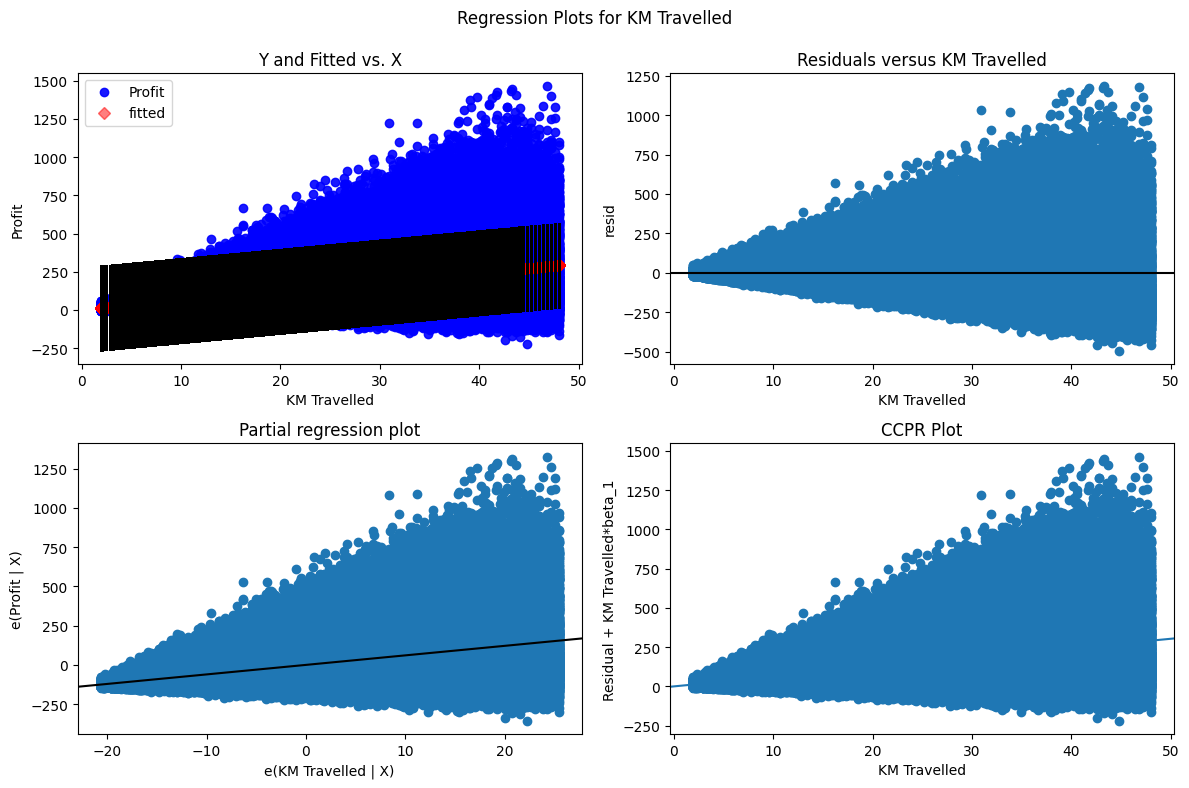

In [69]:
#Plot to confirm homoscedasticity

import matplotlib.pyplot as plt
#define figure size
fig = plt.figure(figsize=(12,8))

#produce residual plots
fig = sm.graphics.plot_regress_exog(model, 'KM Travelled', fig=fig)

In [ ]:
#The plot at the topright hand shows the residual vs. fitted plot. Since the residuals are not randomly scattered around zero, it is an indicatiion that the model is not homoscedastic.

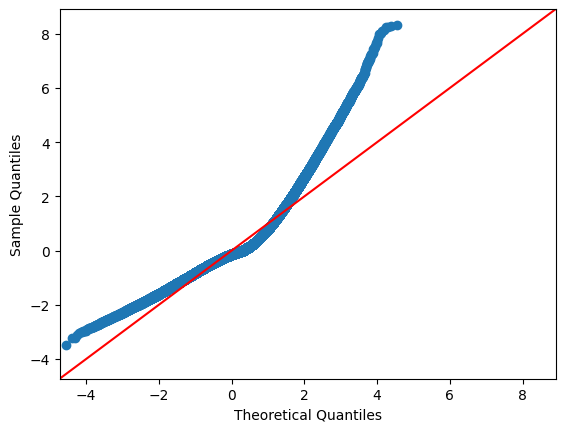

In [70]:
#define residuals
res = model.resid

#create Q-Q plot
fig = sm.qqplot(res, fit=True, line="45")
plt.show() 
plt.close()

In [ ]:
# The residuals stray from the 45 degree straight line, thus we can say that the normality assumption is not met. Thus, we fail to reject the null hypothesis.
# By accepting the null hypothesis, it implies that the regression model may be misleading.

## Recommendations

1. The data as shown in the 'Occurrence of Yellow and Pink Cabs' bar plot shows that the yellow cab company is more patronized    than the pink cab company. From this result, it is recommended that investments can be made in the yellow cab company.

2. The data also shows that overtime, profit for the yellow cab company has been fairly stable and high, it thus shows that the    yellow cab company may have great potentials in the cab industry.

3. The data as shown in the 'yellow and pink cab users in the cities' bar plot shows that cabs are well patronized in highly      populated cities like New York. The result of the Pearson's Correlation Coefficient test showing a positive relationsip        between population and cab users further shows that the higher the population in a city, the more the cab users will be.        This thus suggests that investment can be made in the cab industry in populous cities.

4. The data depicted in the 'Cab Users in Cities' bar plot shows that Boston, San Francisco and Washington DC have the highest    percentage of cab users, with San Francisco leading the three cities. However, from the cab data used, we observe that San      Francisco which presents a great potential for the cab industry has not been tapped by either the yellow cab or pink cab        industry; it is not included in any transactions. It is recommended that investments can be made in the cab industry in San    Francisco as the city has the highest percentage of cab users in general.

5. The bar chart 'Cab Usage Among Age Groups' shows the adult age group as the age group with the highest cab use, accompanied    by the young adults age group. The teen adults been the age group with the lowest patronage. Although our statsitical          result shows no significant association between age group and cab use, it is recommended that certain age groups can serve      as target audience in the cab industry depending on the goals of the camapaign.

6. The bar chart 'Cab Usage Among Income Groups' shows that high income earners use cabs the most, while low middle earners use    cabs the least. This income group classification can serve as target audience in the cab industry depending on the goals of    the campaign.